10. This question should be answered using the `Carseats` data set.

(a) Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.

(b) Provide an interpretation of each coefficient in the model. Becareful—some of the variables in the model are qualitative!

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

(d) For which of the predictors can you reject the null hypothesis $H_0:\beta_j = 0$?

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

(f) How well do the models in (a) and (e) fit the data?

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

(h) Is there evidence of outliers or high leverage observations in the model from (e)?

In [1]:
library(ISLR2)
library(ggplot2)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
head(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [4]:
print(colSums(is.na(Carseats)))

      Sales   CompPrice      Income Advertising  Population       Price 
          0           0           0           0           0           0 
  ShelveLoc         Age   Education       Urban          US 
          0           0           0           0           0 


In [5]:
str(Carseats)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [8]:
df_carseats <- Carseats[, c("Price", "Urban", "US", "Sales")]

In [10]:
head(df_carseats)

,Price,Urban,US,Sales
,<dbl>,<fct>,<fct>,<dbl>
1,120,Yes,Yes,9.50
2,83,Yes,Yes,11.22
3,80,Yes,Yes,10.06
4,97,Yes,Yes,7.40
5,128,Yes,No,4.15
6,72,No,Yes,10.81


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



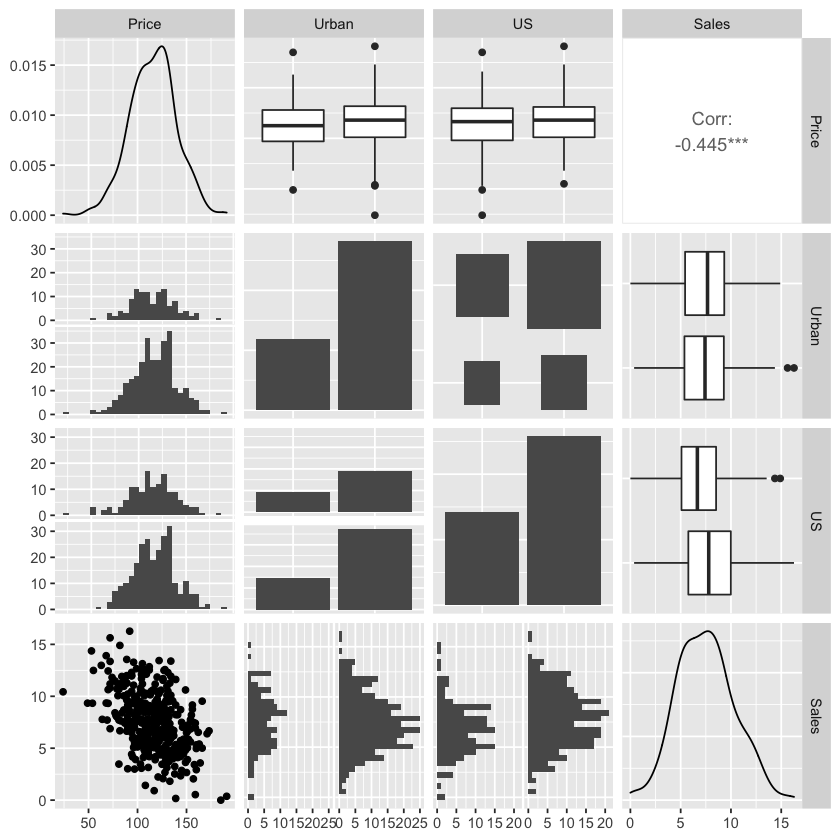

In [15]:
g1 <- ggpairs(df_carseats)
g1

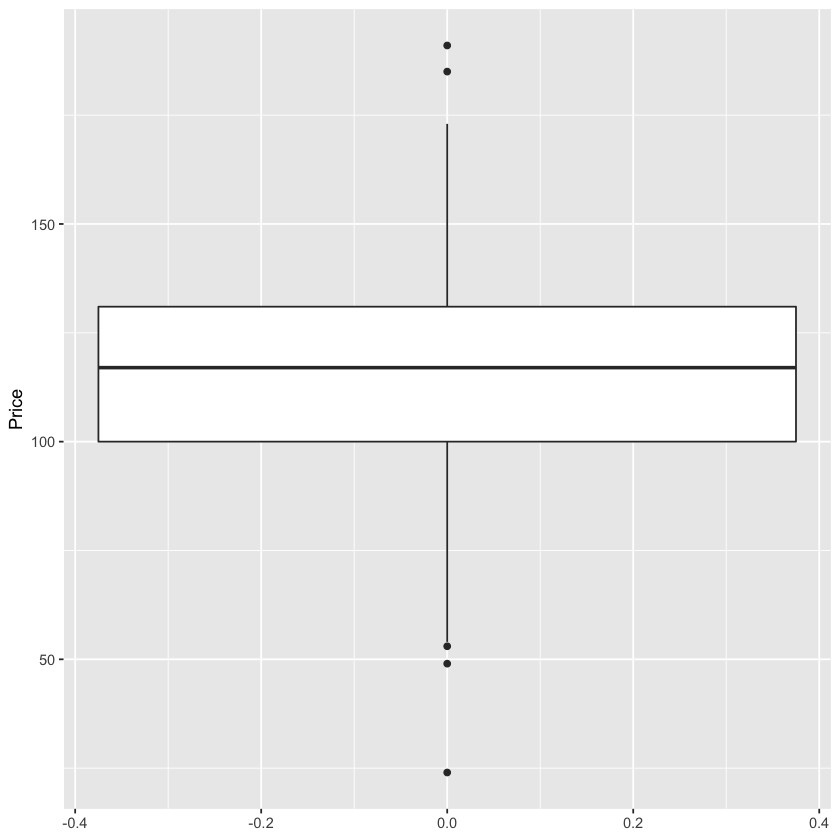

In [23]:
g2 <- ggplot(df_carseats, aes(y = Price)) + geom_boxplot()
g2

(a) Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.

In [59]:
lm.fit <- lm(Sales ~ Price + Urban + US, data = df_carseats)
lm.fit.sum <- summary(lm.fit)
lm.fit.sum


Call:
lm(formula = Sales ~ Price + Urban + US, data = df_carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


In [34]:
summary(lm(Sales ~ Price, data = df_carseats))


Call:
lm(formula = Sales ~ Price, data = df_carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5224 -1.8442 -0.1459  1.6503  7.5108 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.641915   0.632812  21.558   <2e-16 ***
Price       -0.053073   0.005354  -9.912   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.532 on 398 degrees of freedom
Multiple R-squared:  0.198,	Adjusted R-squared:  0.196 
F-statistic: 98.25 on 1 and 398 DF,  p-value: < 2.2e-16


In [35]:
summary(lm(Sales ~ Price + Urban, data = df_carseats))


Call:
lm(formula = Sales ~ Price + Urban, data = df_carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5324 -1.8441 -0.1443  1.6662  7.5000 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.621458   0.655230  20.789   <2e-16 ***
Price       -0.053104   0.005367  -9.895   <2e-16 ***
UrbanYes     0.034095   0.278293   0.123    0.903    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.535 on 397 degrees of freedom
Multiple R-squared:  0.198,	Adjusted R-squared:  0.194 
F-statistic: 49.01 on 2 and 397 DF,  p-value: < 2.2e-16


(b) Provide an interpretation of each coefficient in the model. Becareful—some of the variables in the model are qualitative!

The coefficient for the `Price` predictor indicates that increasing the `Price` by an unit, the sales will decrease by approximately 55 units.

The `UrbanYes` predictor indicates that the store is in an urban place. Given the coefficient, this means that the sales will go down by 22 units if the store is in an urban place.

The `USYes` indicates that the store is inside US. Given the coefficient, this means that the sales will go up by 1200 units if is true.

In [36]:
summary(lm(Sales ~ Price + US, data = df_carseats))


Call:
lm(formula = Sales ~ Price + US, data = df_carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


In [28]:
contrasts(Carseats$US)

,Yes
No,0
Yes,1


(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

`Sales` ~ $\beta_0$ + $\beta_1 \times $ `Price` +  $\beta_2 \times $ `UrbanYes` + $\beta_3 \times $ `USYes` (if in Urban place inside US)

`Sales` = $\beta_0$ + $\beta_1 \times $ `Price` +  $\beta_2$ + $\beta_3$

`Sales` = $\beta$ + $\beta_1 \times $ `Price`, where $\beta = \beta_0 + \beta_2 + \beta_3$.

If the store is outside US and not in an Urban place:

`Sales` ~ $\beta_0$ + $\beta_1 \times $ `Price`

We can also have the mixed not in US but in Urban place, and viceversa.

(d) For which of the predictors can you reject the null hypothesis $H_0:\beta_j = 0$?

If we take the model with `UrbanYes` and `USYes`, then according to the $p$-values, we could reject the `UrbanYes` since it has a very high value.

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

We can see that with the model that regresses `Sales` on `Price` and `US`, both $p$-values are very low.

In [55]:
lm.fit2 <- lm(Sales ~ Price + US, data = df_carseats)
lm.fit2.sum <- summary(lm.fit2)
lm.fit2.sum


Call:
lm(formula = Sales ~ Price + US, data = df_carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


(f) How well do the models in (a) and (e) fit the data?



In [58]:
names(lm.fit2.sum)

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [71]:
data.frame(
    row.names = c("lm1", "lm2"),
    R2 = c(lm.fit.sum$r.squared, lm.fit2.sum$r.squared),
    RSE = c(2.472, 2.469)
)

,R2,RSE
,<dbl>,<dbl>
lm1,0.2392754,2.472
lm2,0.2392629,2.469


According to the $R^2$ values both models fitted the data really bad. Each of them only account for 23% of the variability on the sales. The residual standard error is about 2400 units in both cases, which represents an error of 2.4/7.4*100 = 32% over the mean sales of the data.

In [73]:
2.4/mean(df_carseats$Sales)

[1] 0.3201569

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).


In [74]:
confint(lm.fit2)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


(h) Is there evidence of outliers or high leverage observations in the model from (e)?

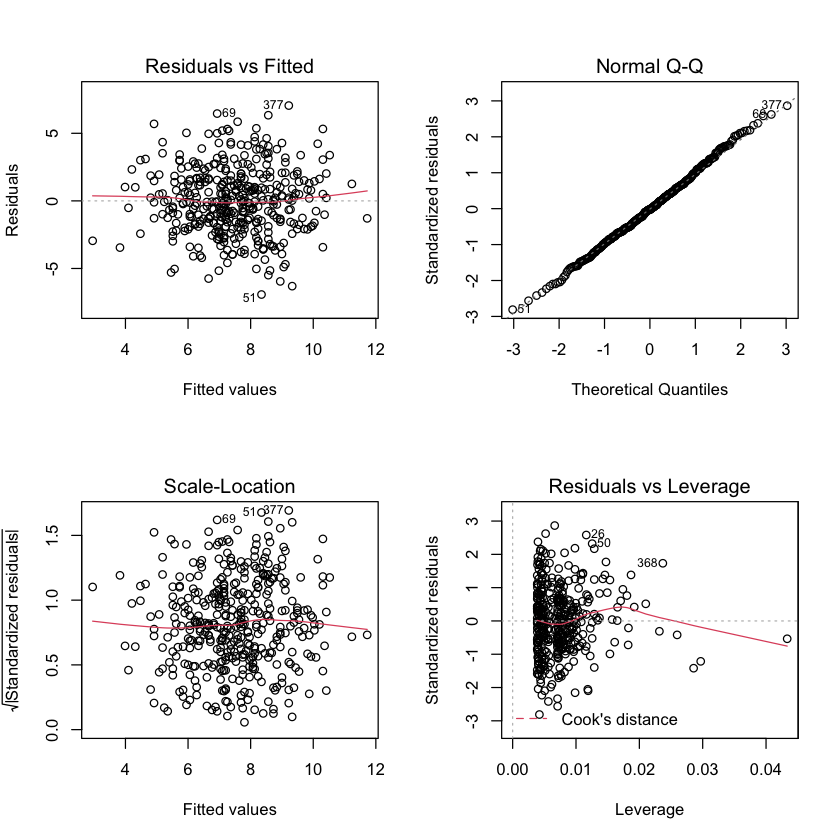

In [75]:
par(mfrow = c(2, 2))
plot(lm.fit2)

According to the bottom-right panel there seems to be a point with leverage, beyond 0.04, but it is not very clear.

The same panel does not suggest any outlier beyond $\pm 3$ in the vertical axis (studentized residuals).